In [42]:
from keras.applications import InceptionV3
from keras.applications import imagenet_utils
from keras.utils import img_to_array
from keras.utils import load_img
import numpy as np
import cv2

In [43]:
inputShape = (299, 299)
preprocess = imagenet_utils.preprocess_input

In [44]:
Network = InceptionV3
model = Network(weights="imagenet")
path="healthy.jpg"
image = load_img(path, target_size=inputShape)
image = img_to_array(image)

In [45]:
image = np.expand_dims(image, axis=0)
print(image.shape)
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

(1, 299, 299, 3)


In [46]:
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

1/1 [==============================] - 3s 3s/step


In [47]:
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. saltshaker: 99.75%
2. pitcher: 0.24%
3. flatworm: 0.01%
4. web_site: 0.00%
5. kimono: 0.00%


In [48]:
orig = cv2.imread(path)
(imagenetID, label, prob) = P[0][0]
orig=cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

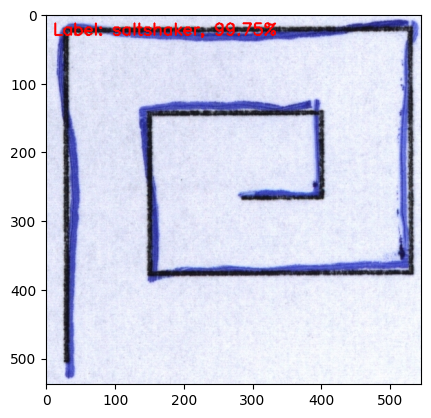

In [49]:
from matplotlib import pyplot as plt

plt.imshow(orig[:,:,::-1])
plt.show()

In [50]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                      

In [51]:
import os
from PIL import Image
X = []
Y= []
inputShape=(299,299)
for filename in os.listdir('PatientMeanderwithAug'):
    try:
        image_path = os.path.join('PatientMeanderwithAug', filename)
        with Image.open(image_path) as image:
            image = image.resize(inputShape)
            image = np.asarray(image)
            X.append(image)
            Y.append(1)
    except Exception as e:
        print(f"Error loading image {filename}: {e}")
        
for filename in os.listdir('HealthyMeanderwithAug'):
    try:
        image_path = os.path.join('HealthyMeanderwithAug', filename)
        with Image.open(image_path) as image:
            image = image.resize(inputShape)
            image = np.asarray(image)
            X.append(image)
            Y.append(0)
    except Exception as e:
        print(f"Error loading image {filename}: {e}")

In [52]:
first_frame = X[0]
print(first_frame.shape)

(299, 299, 3)


In [53]:
len(X)
len(Y)

1409

In [54]:
X=np.array(X)
import numpy as np
X = np.array(X)
Y = np.array(Y)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]
X

array([[[[234, 237, 253],
         [235, 238, 254],
         [234, 237, 254],
         ...,
         [236, 239, 253],
         [229, 232, 247],
         [232, 235, 250]],

        [[224, 227, 244],
         [229, 232, 249],
         [231, 234, 251],
         ...,
         [234, 237, 252],
         [231, 234, 249],
         [234, 237, 252]],

        [[226, 229, 246],
         [229, 232, 249],
         [232, 235, 252],
         ...,
         [230, 233, 248],
         [227, 230, 245],
         [228, 231, 246]],

        ...,

        [[228, 233, 245],
         [233, 237, 251],
         [233, 237, 252],
         ...,
         [237, 240, 253],
         [241, 245, 255],
         [236, 240, 252]],

        [[226, 232, 250],
         [229, 234, 252],
         [229, 234, 252],
         ...,
         [237, 240, 255],
         [238, 242, 254],
         [234, 238, 250]],

        [[226, 231, 251],
         [228, 233, 252],
         [223, 228, 247],
         ...,
         [234, 237, 252],
        

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
X_train
Y_train


array([0, 1, 1, ..., 1, 0, 1])

In [57]:
len(X_train)

1127

In [74]:
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam 

In [75]:
model = Network(weights="imagenet",include_top=False)
x=model.output
x=GlobalAveragePooling2D()(x)
#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(1,activation='sigmoid')(x) #final layer with softmax activation



In [76]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_470 (Conv2D)            (None, None, None,   864         ['input_6[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_470 (Batch  (None, None, None,   96         ['conv2d_470[0][0]']             
 Normalization)                 32)                                                    

In [78]:
len(model.layers)

311

In [79]:
X_train=np.array(X_train)
X_train

array([[[[246, 248, 255],
         [245, 247, 255],
         [239, 241, 253],
         ...,
         [243, 248, 252],
         [244, 248, 252],
         [244, 247, 252]],

        [[245, 247, 254],
         [233, 235, 246],
         [235, 237, 249],
         ...,
         [244, 249, 253],
         [244, 249, 253],
         [237, 240, 245]],

        [[233, 235, 247],
         [229, 231, 243],
         [232, 234, 246],
         ...,
         [245, 250, 255],
         [241, 246, 251],
         [243, 246, 251]],

        ...,

        [[245, 249, 255],
         [235, 239, 250],
         [224, 228, 240],
         ...,
         [238, 241, 250],
         [237, 240, 249],
         [242, 245, 252]],

        [[239, 243, 254],
         [234, 238, 249],
         [234, 238, 249],
         ...,
         [245, 248, 255],
         [240, 243, 250],
         [241, 244, 251]],

        [[237, 241, 253],
         [235, 239, 251],
         [241, 245, 255],
         ...,
         [243, 246, 253],
        

In [52]:
history=model.fit(X_train,np.array(Y_train),epochs=10,validation_data=(X_test, np.array(Y_test)))

Epoch 1/10
36/36 [==============================] - 283s 8s/step - loss: 19.1140 - accuracy: 0.6442 - val_loss: 1.9251 - val_accuracy: 0.7979
Epoch 2/10
36/36 [==============================] - 258s 7s/step - loss: 0.7690 - accuracy: 0.7533 - val_loss: 0.7471 - val_accuracy: 0.6312
Epoch 3/10
36/36 [==============================] - 244s 7s/step - loss: 0.5501 - accuracy: 0.7844 - val_loss: 0.3564 - val_accuracy: 0.8617
Epoch 4/10
36/36 [==============================] - 244s 7s/step - loss: 0.5867 - accuracy: 0.7666 - val_loss: 0.3836 - val_accuracy: 0.8298
Epoch 5/10
36/36 [==============================] - 228s 6s/step - loss: 0.6174 - accuracy: 0.7791 - val_loss: 0.5495 - val_accuracy: 0.7163
Epoch 6/10
36/36 [==============================] - 263s 7s/step - loss: 0.3970 - accuracy: 0.8217 - val_loss: 0.6198 - val_accuracy: 0.8014
Epoch 7/10
36/36 [==============================] - 216s 6s/step - loss: 0.4858 - accuracy: 0.7941 - val_loss: 0.3409 - val_accuracy: 0.8582
Epoch 8/10
3